In [50]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools

def draw_gambler(results):
    plt.figure(figsize=(8, 8))
    for r in results:
        x = r[0]
        if isinstance(r[0], dict):
            x = np.zeros(len(r[0]))
            for i, k in enumerate(sorted(r[0].keys())):
                x[i] = np.max(r[0][k])
        plt.plot(x, label = r[1])
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')
    plt.show()

def q2v(Q, state_action):
    v = []
    for s in sorted(list(Q.keys())):
        v.append(np.max(Q[s]))
    return v

def draw_policy(Q, state_action):
    plt.figure(figsize=(8, 8))
    policy = []
    for s in sorted(list(Q.keys())):
        policy.append(state_action[s][np.argmax(Q[s])])
    plt.scatter(list(range(min(Q.keys()), max(Q.keys())+1)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Chapter 7 n-step TD Prediction

### 7.1 Use td(n) to estimate v(s)

code see [TDN](./c07_tdnpy#L11)

<img src="./avatar/c07_1.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 836 ms, sys: 15.2 ms, total: 852 ms
Wall time: 943 ms
CPU times: user 2.84 s, sys: 31.2 ms, total: 2.87 s
Wall time: 3.01 s
CPU times: user 1.57 s, sys: 24.3 ms, total: 1.59 s
Wall time: 1.7 s


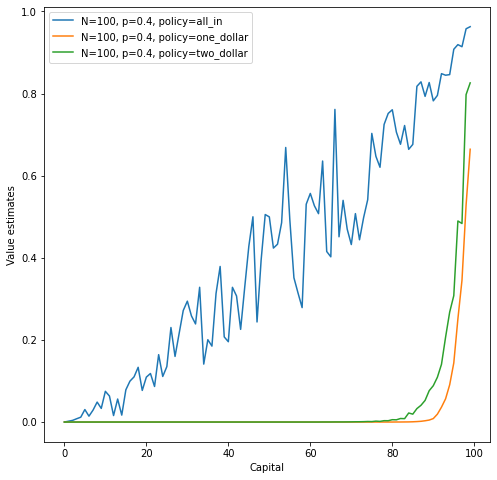

In [40]:
from c00_env import GamblerEnv, GamblerPolicy
from c07_tdn import TDN

env = GamblerEnv(N=100, p=0.4, include_terminate_state=False, seed=11)
tdn = TDN(env, n_steps=3)
%time v_1 = tdn.fit_v(policy=GamblerPolicy['all_in'], epochs=20000)
%time v_2 = tdn.fit_v(policy=GamblerPolicy['one_dollar'], epochs=2000)
%time v_3 = tdn.fit_v(policy=GamblerPolicy['two_dollar'], epochs=2000)

draw_gambler([
    (v_1, 'N={}, p={}, policy={}'.format(100, 0.4, 'all_in')),
    (v_2, 'N={}, p={}, policy={}'.format(100, 0.4, 'one_dollar')),
    (v_3, 'N={}, p={}, policy={}'.format(100, 0.4, 'two_dollar')),
])


In [44]:
from c00_env import HermanEnv, HermanPolicy
from c07_tdn import TDN

env = HermanEnv(N=11, M=3, p=0.5, seed=11)
tdn = TDN(env)
%time v_1 = tdn.fit_v(policy=HermanPolicy['random'], epochs=10000)

print(v_1, np.max(v_1), env.get_state_name(np.argmax(v_1)))

CPU times: user 1.02 s, sys: 27 ms, total: 1.05 s
Wall time: 1.1 s
[ 2.1952  5.1831  7.5288  5.62    6.3093 10.89   12.771  11.9182 15.2166
 15.8016] 15.8016 (0, 3, 7)


In [43]:
from c00_env import HermanEnv, HermanPolicy
from c07_tdn import TDN

env = HermanEnv(N=11, M=7, p=0.5, seed=11)
tdn = TDN(env)
%time v_1 = tdn.fit_v(policy=HermanPolicy['random'], epochs=10000)

print(v_1, np.max(v_1), env.get_state_name(np.argmax(v_1)))

CPU times: user 1.29 s, sys: 20.8 ms, total: 1.31 s
Wall time: 1.47 s
[ 8.018  11.9254 13.1588 12.3498 11.5954 13.0642 14.2499 12.8383 13.1711
 10.3439 10.4573 11.2782 13.319   2.6594 11.4205  4.6787  8.7848 13.9567
 11.6976 10.5825 13.0584 15.6399 19.1034 13.7278 13.5806 12.0122 16.7212
 19.1798 15.3264 13.2002 14.4953  7.0384 10.2341 13.3614 14.5908 12.5543
  6.3794 12.6636 16.8197 14.3364 13.5247 11.5676 13.3395 16.2682  9.2427
  9.4407 10.4826  7.8029 13.372  14.7385 15.6686  8.823  13.2851 16.9462
 11.0436 11.8816] 19.1798 (0, 3, 7)


### 7.2 Use Sarsa(n) to estimate q(s) q*(s)

code see [NStepSarsa](./c07_tdnpy#L57)

<img src="./avatar/c07_2.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 898 ms, sys: 14.1 ms, total: 912 ms
Wall time: 980 ms
CPU times: user 15.8 s, sys: 132 ms, total: 16 s
Wall time: 16.5 s
CPU times: user 8.14 s, sys: 81.3 ms, total: 8.22 s
Wall time: 8.43 s
CPU times: user 3.51 s, sys: 157 ms, total: 3.67 s
Wall time: 3.65 s


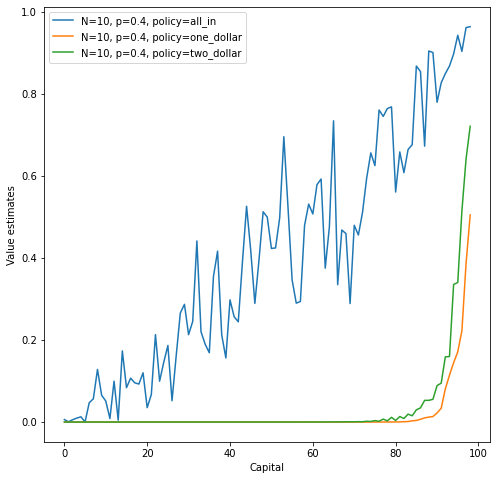

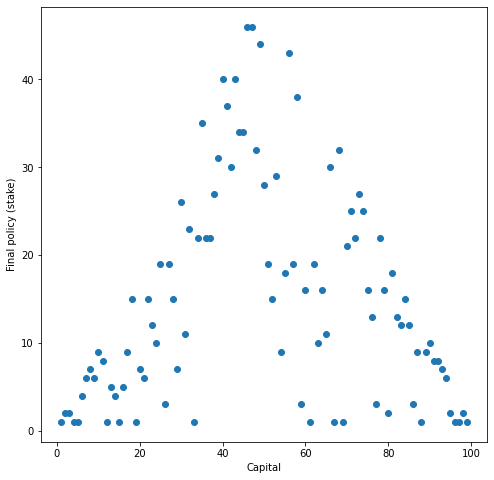

In [52]:
from c00_env import GamblerEnv, GamblerPolicy
from c07_tdn import NStepSarsa

env = GamblerEnv(N=100, p=0.4, include_terminate_state=False, seed=11)
nsarsa = NStepSarsa(env, n_steps=3)
%time q_1 = nsarsa.fit_q(policy=GamblerPolicy['all_in'], epochs=20000)
%time q_2 = nsarsa.fit_q(policy=GamblerPolicy['one_dollar'], epochs=10000)
%time q_3 = nsarsa.fit_q(policy=GamblerPolicy['two_dollar'], epochs=10000)
%time q_4 = nsarsa.fit_q(policy=None, epochs=10000)


draw_gambler([
    (q_1, 'N={}, p={}, policy={}'.format(10, 0.4, 'all_in')),
    (q_2, 'N={}, p={}, policy={}'.format(10, 0.4, 'one_dollar')),
    (q_3, 'N={}, p={}, policy={}'.format(10, 0.4, 'two_dollar')),
])

#for k, v in q_4.items():
#    print(k, v)
draw_policy(q_4, env.get_all_state_action())

CPU times: user 1.46 s, sys: 28.5 ms, total: 1.49 s
Wall time: 1.69 s
1 [0.0482]
2 [0.0048 0.125 ]
3 [0.0225 0.011  0.1256]
4 [0.0374 0.0551 0.0819 0.2297]
5 [0.0785 0.0881 0.1651 0.1483 0.4485]
6 [0.1196 0.1795 0.1503 0.3792]
7 [0.5386 0.2313 0.2711]
8 [0.266  0.5732]
9 [0.6847]


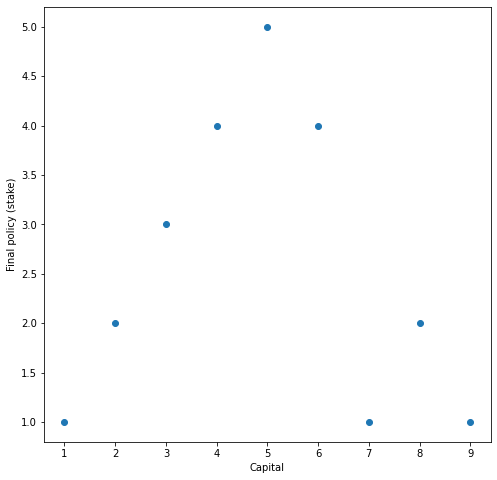

In [60]:
from c00_env import GamblerEnv, GamblerPolicy
from c07_tdn import NStepSarsa

env = GamblerEnv(N=10, p=0.4, include_terminate_state=False, seed=11)
nsarsa = NStepSarsa(env, n_steps=4)
%time q_4 = nsarsa.fit_q(policy=None, epochs=10000)

for k, v in q_4.items():
    print(k, v)
draw_policy(q_4, env.get_all_state_action())